<a href="https://colab.research.google.com/github/hari250823/speecht5_fine-tune/blob/main/SpeechT5_tamil_finetuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets soundfile speechbrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.2/807.2 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 47.2 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-6nq9s64t
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-6nq9s64t
  Resolved https://github.com/huggingface/transformers.git to commit 940a6bd343cfd2ff4f4425b4cbc548d1e1d316da
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.1 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.47.0.dev0-py3-none-any.whl size=10036163 sha256=508fd7822177397e7eb78ab3339e37c89fde7fda807d8f8f66522ccb4011f455
  Stored in directory: /tmp/pip-ephem-wheel-cache-76x2w6vu/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      S

In [ ]:
!pip install --upgrade accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


In [ ]:
!nvidia-smi

Fri Oct 25 00:28:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech, XLMRobertaTokenizer

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [ ]:
from huggingface_hub import login

token= "Enter you token"
login(token)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from datasets import load_dataset, Audio

dataset = load_dataset("mozilla-foundation/common_voice_17_0", "ta", split = 'train')

README.md:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

common_voice_17_0.py:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/132k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_17_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_17_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


n_shards.json:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

ta_train_0.tar:   0%|          | 0.00/1.60G [00:00<?, ?B/s]

ta_train_1.tar:   0%|          | 0.00/225M [00:00<?, ?B/s]

ta_dev_0.tar:   0%|          | 0.00/434M [00:00<?, ?B/s]

ta_test_0.tar:   0%|          | 0.00/455M [00:00<?, ?B/s]

ta_other_0.tar:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

ta_other_1.tar:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

ta_other_2.tar:   0%|          | 0.00/496M [00:00<?, ?B/s]

ta_invalidated_0.tar:   0%|          | 0.00/231M [00:00<?, ?B/s]

ta_validated_0.tar:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

ta_validated_1.tar:   0%|          | 0.00/1.53G [00:00<?, ?B/s]

ta_validated_2.tar:   0%|          | 0.00/1.65G [00:00<?, ?B/s]

ta_validated_3.tar:   0%|          | 0.00/653M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/19.6M [00:00<?, ?B/s]

transcript/ta/dev.tsv:   0%|          | 0.00/5.20M [00:00<?, ?B/s]

transcript/ta/test.tsv:   0%|          | 0.00/4.94M [00:00<?, ?B/s]

other.tsv:   0%|          | 0.00/39.5M [00:00<?, ?B/s]

transcript/ta/invalidated.tsv:   0%|          | 0.00/2.50M [00:00<?, ?B/s]

validated.tsv:   0%|          | 0.00/56.8M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 10134it [00:00, 101315.70it/s]
Reading metadata...: 21019it [00:00, 105745.19it/s]
Reading metadata...: 31594it [00:00, 104031.71it/s]
Reading metadata...: 45587it [00:00, 105025.84it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 5621it [00:00, 56204.83it/s]
Reading metadata...: 12095it [00:00, 52414.88it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 12074it [00:00, 84692.74it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 9692it [00:00, 96907.62it/s]
Reading metadata...: 19925it [00:00, 100073.70it/s]
Reading metadata...: 30140it [00:00, 101019.15it/s]
Reading metadata...: 40727it [00:00, 102930.85it/s]
Reading metadata...: 53752it [00:00, 112777.61it/s]
Reading metadata...: 65030it [00:00, 105694.61it/s]
Reading metadata...: 75677it [00:00, 102053.56it/s]
Reading metadata...: 93989it [00:00, 101625.66it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 5693it [00:00, 107173.13it/s]


Generating validated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 11720it [00:00, 117177.20it/s]
Reading metadata...: 23438it [00:00, 116904.31it/s]
Reading metadata...: 35129it [00:00, 115577.35it/s]
Reading metadata...: 46689it [00:00, 113631.65it/s]
Reading metadata...: 58078it [00:00, 113720.97it/s]
Reading metadata...: 69454it [00:00, 100376.38it/s]
Reading metadata...: 79734it [00:00, 98237.33it/s] 
Reading metadata...: 90813it [00:00, 101907.46it/s]
Reading metadata...: 102265it [00:00, 105623.07it/s]
Reading metadata...: 113276it [00:01, 106943.93it/s]
Reading metadata...: 124058it [00:01, 106660.01it/s]
Reading metadata...: 135391it [00:01, 106028.63it/s]


In [ ]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

In [ ]:
len(dataset)

45587

In [ ]:
tokenizer = processor.tokenizer

In [ ]:
def extract_all_chars(batch):
    all_text = " ".join(batch["sentence"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/45587 [00:00<?, ? examples/s]

In [ ]:
dataset_vocab - tokenizer_vocab

{' ',
 '&',
 '_',
 '`',
 '·',
 'á',
 'ô',
 'š',
 'ஃ',
 'அ',
 'ஆ',
 'இ',
 'ஈ',
 'உ',
 'ஊ',
 'எ',
 'ஏ',
 'ஐ',
 'ஒ',
 'ஓ',
 'ஔ',
 'க',
 'ங',
 'ச',
 'ஜ',
 'ஞ',
 'ட',
 'ண',
 'த',
 'ந',
 'ன',
 'ப',
 'ம',
 'ய',
 'ர',
 'ற',
 'ல',
 'ள',
 'ழ',
 'வ',
 'ஷ',
 'ஸ',
 'ஹ',
 'ா',
 'ி',
 'ீ',
 'ு',
 'ூ',
 'ெ',
 'ே',
 'ை',
 'ொ',
 'ோ',
 'ௌ',
 '்',
 'ௗ',
 'ഥ',
 '–',
 '‘',
 '’',
 '‚',
 '“',
 '”',
 '•',
 '…',
 '′',
 '″',
 '●',
 '◯'}

In [ ]:
replacements = [
    (' ', ' '),  # Space
    ('&', 'and'),  # Ampersand
    ('_', '_'),  # Underscore
    ('`', '`'),  # Backtick
    ('·', '.'),  # Middle dot
    ('á', 'a'),  # Accent on 'a'
    ('ô', 'o'),  # Accent on 'o'
    ('š', 's'),  # 'S' with caron (soft s sound)
    ('ஃ', 'akh'),  # Aytham (Tamil diacritic)
    ('அ', 'a'),  # Tamil letter A
    ('ஆ', 'aa'),  # Tamil letter AA
    ('இ', 'i'),  # Tamil letter I
    ('ஈ', 'ii'),  # Tamil letter II
    ('உ', 'u'),  # Tamil letter U
    ('ஊ', 'uu'),  # Tamil letter UU
    ('எ', 'e'),  # Tamil letter E
    ('ஏ', 'ee'),  # Tamil letter EE
    ('ஐ', 'ai'),  # Tamil letter AI
    ('ஒ', 'o'),  # Tamil letter O
    ('ஓ', 'oo'),  # Tamil letter OO
    ('ஔ', 'au'),  # Tamil letter AU
    ('க', 'ka'),  # Tamil letter KA
    ('ங', 'nga'),  # Tamil letter NGA
    ('ச', 'cha'),  # Tamil letter CHA
    ('ஜ', 'ja'),  # Tamil letter JA
    ('ஞ', 'nya'),  # Tamil letter NYA
    ('ட', 'ta'),  # Tamil letter TTA (retroflex T)
    ('ண', 'na'),  # Tamil letter NNA (retroflex N)
    ('த', 'tha'),  # Tamil letter THA
    ('ந', 'na'),  # Tamil letter NA
    ('ன', 'na'),  # Tamil letter NN (alveolar N)
    ('ப', 'pa'),  # Tamil letter PA
    ('ம', 'ma'),  # Tamil letter MA
    ('ய', 'ya'),  # Tamil letter YA
    ('ர', 'ra'),  # Tamil letter RA
    ('ற', 'rra'),  # Tamil letter RRA (retroflex R)
    ('ல', 'la'),  # Tamil letter LA
    ('ள', 'lla'),  # Tamil letter LLA (retroflex L)
    ('ழ', 'zha'),  # Tamil letter LLA (unique Tamil letter)
    ('வ', 'va'),  # Tamil letter VA
    ('ஷ', 'sha'),  # Tamil letter SHA
    ('ஸ', 'sa'),  # Tamil letter SA
    ('ஹ', 'ha'),  # Tamil letter HA
    ('ா', 'aa'),  # Long A (Tamil vowel extension)
    ('ி', 'i'),  # Short I (Tamil vowel extension)
    ('ீ', 'ii'),  # Long I (Tamil vowel extension)
    ('ு', 'u'),  # Short U (Tamil vowel extension)
    ('ூ', 'uu'),  # Long U (Tamil vowel extension)
    ('ெ', 'e'),  # Short E (Tamil vowel extension)
    ('ே', 'ee'),  # Long E (Tamil vowel extension)
    ('ை', 'ai'),  # Tamil diphthong AI
    ('ொ', 'o'),  # Short O (Tamil vowel extension)
    ('ோ', 'oo'),  # Long O (Tamil vowel extension)
    ('ௌ', 'au'),  # Tamil diphthong AU
    ('்', ''),  # Tamil virama (removes inherent vowel)
    ('ௗ', 'au'),  # Rare Tamil vowel diacritic
    ('ഥ', 'tha'),  # Malayalam letter THA
    ('–', '-'),  # En dash
    ('‘', "'"),  # Left single quotation mark
    ('’', "'"),  # Right single quotation mark
    ('‚', ','),  # Single low quotation mark
    ('“', '"'),  # Left double quotation mark
    ('”', '"'),  # Right double quotation mark
    ('•', '.'),  # Bullet point
    ('…', '...'),  # Ellipsis
    ('′', "'"),  # Prime (minutes or feet symbol)
    ('″', '"'),  # Double prime (seconds or inches symbol)
    ('●', '.'),  # Filled bullet
    ('◯', 'o'),  # Circle symbol
]

def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["sentence"] = inputs["sentence"].replace(src, dst)
    return inputs

dataset = dataset.map(cleanup_text)

Map:   0%|          | 0/45587 [00:00<?, ? examples/s]

In [ ]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name)
)

def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

<ipython-input-14-9f95de381175>:3: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

In [ ]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["sentence"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

In [ ]:
processed_example = prepare_dataset(dataset[0])

In [ ]:
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [ ]:
tokenizer.decode(processed_example["input_ids"])

'avaraaipa paothaumakakalla vaitaaamala painanaaalaeeyaee thaurathathaika kaonataee ootainaaarakalla.</s>'

In [ ]:
processed_example["speaker_embeddings"].shape

(512,)

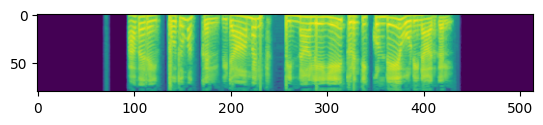

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [ ]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [ ]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)

model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

In [ ]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)

In [ ]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset.column_names,
)

Map:   0%|          | 0/45587 [00:00<?, ? examples/s]

In [ ]:
len(dataset)

45587

In [ ]:
dataset = dataset.train_test_split(test_size=0.1)


In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:

        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids,
            labels=label_features,
            return_tensors="pt",
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor([
                len(feature["input_values"]) for feature in label_features
            ])
            target_lengths = target_lengths.new([
                length - length % model.config.reduction_factor for length in target_lengths
            ])
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [ ]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [ ]:
features = [
    dataset["train"][0],
    dataset["train"][1],
    dataset["train"][20],
]

batch = data_collator(features)

In [ ]:
{k:v.shape for k,v in batch.items()}

{'input_ids': torch.Size([3, 161]),
 'attention_mask': torch.Size([3, 161]),
 'labels': torch.Size([3, 636, 80]),
 'speaker_embeddings': torch.Size([3, 512])}

In [ ]:
model.config.use_cache = False

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./speecht5_tts_tamil",  # change to a repo name of your choice
    per_device_train_batch_size=16,
    gradient_accumulation_steps=2,
    learning_rate=1e-5,
    warmup_steps=1000,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=8,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor.tokenizer,
)

<ipython-input-33-4a9303382841>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
max_steps is given, it will override any value given in num_train_epochs


In [ ]:
trainer.train()

Step,Training Loss,Validation Loss
1000,1.143500,0.515066
2000,1.062300,0.481763
3000,1.017800,0.469354
4000,1.014700,0.468180


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2816: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 1876}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=4000, training_loss=1.1417524456977843, metrics={'train_runtime': 7931.4049, 'train_samples_per_second': 16.138, 'train_steps_per_second': 0.504, 'total_flos': 2.0737196396823456e+16, 'train_loss': 1.1417524456977843, 'epoch': 3.1189083820662766})

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
len(dataset)

2

In [ ]:
kwargs = {
    "dataset_tags": "mozilla-foundation/common_voice_17_0",
    "dataset": "CommonVoice",  # a 'pretty' name for the training dataset
    "dataset_args": "config: ta, split: train",
    "language": "ma",
    "model_name": "SpeechT5_TTS_tamil",  # a 'pretty' name for your model
    "finetuned_from": "microsoft/speecht5_tts",
    "tasks": "text-to-speech",
    "tags": "",
}

In [ ]:
trainer.push_to_hub(**kwargs)

ValueError: Invalid metadata in README.md.
- "tags[0]" is not allowed to be empty

In [ ]:
pretrained_model = "anirxudh/speecht5_tts_tamil"
model = SpeechT5ForTextToSpeech.from_pretrained(pretrained_model)

config.json:   0%|          | 0.00/2.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/578M [00:00<?, ?B/s]

In [ ]:
example = dataset["test"][304]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)
speaker_embeddings.shape

torch.Size([1, 512])

In [ ]:
ip="வானம் நீலமாக உள்ளது "

In [ ]:
def convert(sentence):
    for src, dst in replacements:
        sentence = sentence.replace(src, dst)
    return sentence

text1=convert(ip)

In [ ]:
text1

'vaaanama naiilamaaaka ullallathau '

In [ ]:
inputs = processor(text=text1, return_tensors="pt")

In [ ]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

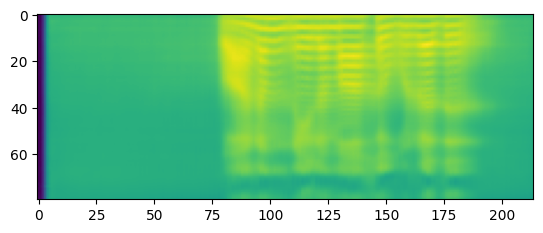

In [ ]:
plt.figure()
plt.imshow(spectrogram.T)
plt.show()

In [ ]:
with torch.no_grad():
    speech = vocoder(spectrogram)

NameError: name 'torch' is not defined

In [ ]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)

In [ ]:

import soundfile as sf
sf.write("output_ta.wav", speech.numpy(), samplerate=16000)

NameError: name 'speech' is not defined